# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sinasc = pd.read_csv('SINASC_RO_2019.csv')
%matplotlib inline



#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
sinasc.loc[sinasc['APGAR5'] <= 3, 'CLASS_APGAR'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] > 3) & (sinasc['APGAR5'] <= 5),
       'CLASS_APGAR'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] > 5) & (sinasc['APGAR5'] <= 7),
       'CLASS_APGAR'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] > 7), 'CLASS_APGAR'] = 'normal'
sinasc[['CLASS_APGAR']].value_counts()

CLASS_APGAR     
normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [3]:
df = sinasc[['APGAR5', 'SEXO','PESO', 'GESTACAO','CLASS_APGAR']]
dfa = df.copy()
dfa.dropna(inplace=True)
dfa.isna().sum().sort_values(ascending=False)

APGAR5         0
SEXO           0
PESO           0
GESTACAO       0
CLASS_APGAR    0
dtype: int64

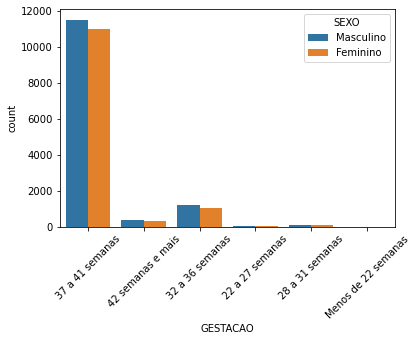

In [4]:
ax = sns.countplot(x='GESTACAO'
              , hue = 'SEXO'
              , data=dfa[dfa.APGAR5 > 0]
             )

ax.tick_params(axis='x', rotation = 45)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
# Tabela cruzada
freq = pd.crosstab(dfa['APGAR5'], dfa['GESTACAO'])
freq

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,7,0,2,5,1,1
1.0,0,0,2,20,0,0
2.0,8,2,1,3,0,1
3.0,6,1,2,5,0,0
4.0,1,5,8,7,0,0
5.0,0,7,11,21,1,0
6.0,2,7,17,44,1,0
7.0,10,11,56,151,5,1
8.0,24,61,362,1417,44,0


In [30]:
freq.sum(axis = 1)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2233
37 a 41 semanas        22520
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [7]:
freq_perclin = freq.div(freq.sum(axis = 1), axis = 0)
freq_perclin

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,0.437500,0.000000,0.125000,0.312500,0.062500,0.062500
1.0,0.000000,0.000000,0.090909,0.909091,0.000000,0.000000
2.0,0.533333,0.133333,0.066667,0.200000,0.000000,0.066667
3.0,0.428571,0.071429,0.142857,0.357143,0.000000,0.000000
4.0,0.047619,0.238095,0.380952,0.333333,0.000000,0.000000
5.0,0.000000,0.175000,0.275000,0.525000,0.025000,0.000000
6.0,0.028169,0.098592,0.239437,0.619718,0.014085,0.000000
7.0,0.042735,0.047009,0.239316,0.645299,0.021368,0.004274
8.0,0.012579,0.031971,0.189727,0.742662,0.023061,0.000000


In [8]:
freq_perclin.sum(axis = 1)

APGAR5
0.0     1.0
1.0     1.0
2.0     1.0
3.0     1.0
4.0     1.0
5.0     1.0
6.0     1.0
7.0     1.0
8.0     1.0
9.0     1.0
10.0    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [32]:
campo = 'GESTACAO'
print(f'OCORRÊNCIAS DE {dfa[[campo]].value_counts()}\n')


OCORRÊNCIAS DE GESTACAO           
37 a 41 semanas        22520
32 a 36 semanas         2233
42 semanas e mais        698
28 a 31 semanas          162
22 a 27 semanas           85
Menos de 22 semanas        7
dtype: int64



<AxesSubplot:ylabel='APGAR5'>

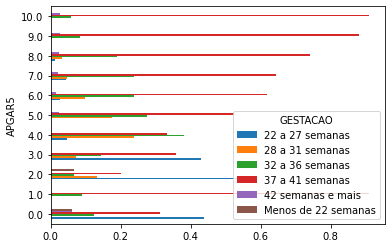

In [10]:
freq_perclin.plot.barh()

<AxesSubplot:xlabel='GESTACAO'>

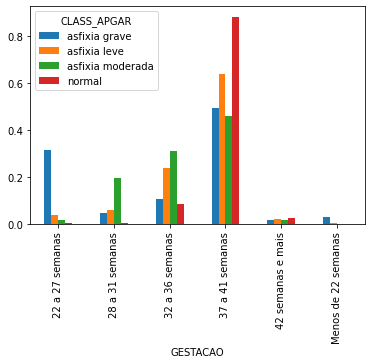

In [11]:
freq = pd.crosstab(dfa['GESTACAO'], dfa['CLASS_APGAR'])
freq_perclin = freq.div(freq.sum(axis = 0), axis = 1)
freq_perclin.plot.bar()

## CONCLUSÃO
O primeiro gráfico revela indícios de que as notas APGAR5 abaixo de 3.0 (asfixia grave) tendem a ocorrer com maior frequência em gestações de 22 a 27 semanas, exceto pelas faixa de notas APGAR5 = 1.0, onde houve um grande número de ocorrências de gestações consideradas normais a partir de 37 semanas.

Para comprovar a tese de que partos prematuros são abaixo de 37 semanas de gestação, construímos o segundo gráfico comparando com a categorização do APGAR5, sendo então possível evidenciar que as pricipais ocorrências de asfixia acontecem justamente nas gestações inferiores a 37 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

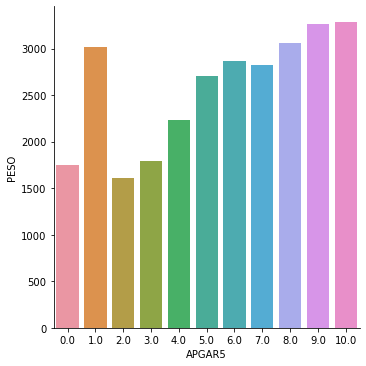

In [12]:
sns.catplot(x='APGAR5'
            , y='PESO'
            , kind='bar'
            , data=dfa
            , ci=None
           )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 20539 to 3983
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   APGAR5       22 non-null     float64
 1   SEXO         22 non-null     object 
 2   PESO         22 non-null     int64  
 3   GESTACAO     22 non-null     object 
 4   CLASS_APGAR  22 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.0+ KB


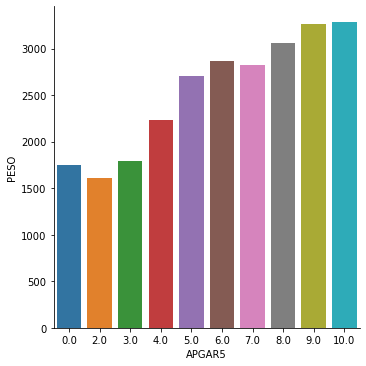

In [13]:
sns.catplot(x='APGAR5'
            , y='PESO'
            , kind='bar'
            , data=dfa[dfa.APGAR5!=1]
            , ci=None
           )
dfa.query('APGAR5==1').sort_values('PESO').info()

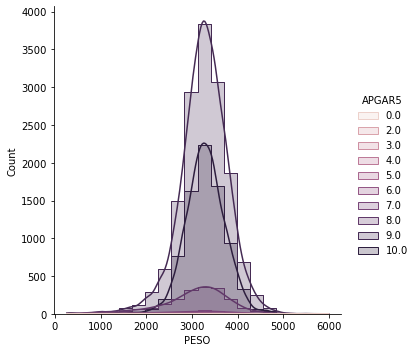

In [14]:
sns.displot(data = dfa[dfa.APGAR5!=1]
            ,x = 'PESO'
            ,hue = 'APGAR5'
            ,bins = 20
            ,element = 'step'
            ,kde = True 
            ,alpha = .25                         
           )

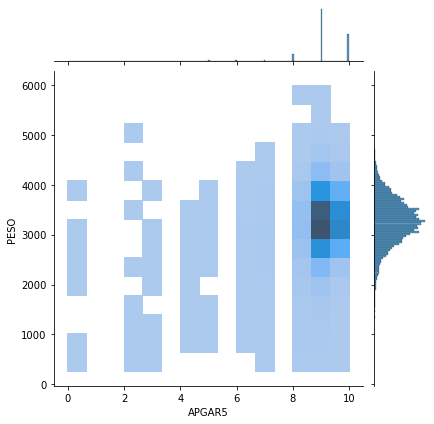

In [15]:
sns.jointplot(x = 'APGAR5'
              , y = 'PESO'
              , data = dfa[dfa.APGAR5!=1]
              , kind="hist"
              , bins = [15, 15])

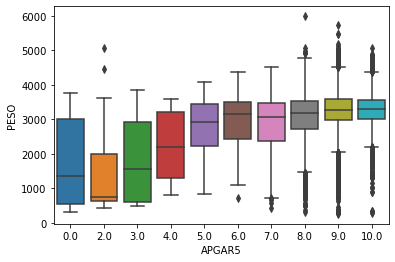

In [16]:
ax = sns.boxplot(x="APGAR5", y="PESO", data=dfa[dfa.APGAR5!=1])

### CONCLUSÃO
Os dados apresentaram severa distoção em função das 22 das 25705 ocorrências no APGAR5=1.0 com peso dentro da média das notas superiores a 8.0.
Assim, para que a análise não fosse prejudicada, decidimos remover esta faixa de dados deixando comprovada a relação entre a nota APGAR e o PESO corporal do RN, evidenciando que quanto menor a nota, menor o peso.


# TRATANDO OS OUTLIERS

<AxesSubplot:>

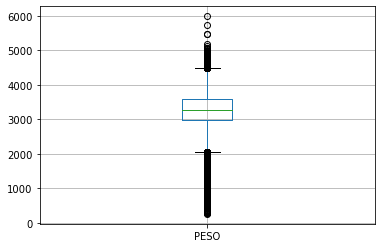

In [17]:
dfa.boxplot(['PESO'])

### CALCULANDO E ELIMINANDO OUTLIERS

<AxesSubplot:>

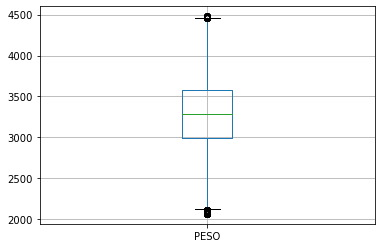

In [42]:
valor = dfa['PESO']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
selecao = (valor>= limite_inferior) & (valor<= limite_superior)
dfa_out = dfa[selecao]
dfa_out.boxplot(['PESO'])

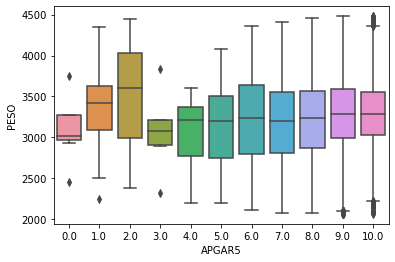

In [34]:
ax = sns.boxplot(x="APGAR5", y="PESO", data=dfa_out)

<AxesSubplot:xlabel='APGAR5', ylabel='PESO'>

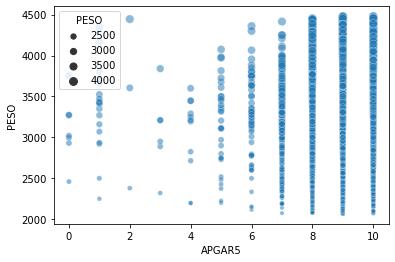

In [39]:
sns.scatterplot(x = 'APGAR5'
                ,y = 'PESO'
                ,data = dfa_out#[dfa_out.APGAR5!=1]
                ,alpha = .5
#               ,hue = 'SEXO' 
                ,size = 'PESO' 
               )

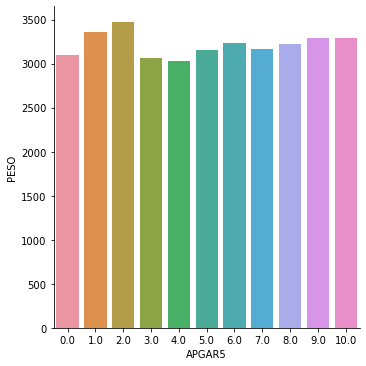

In [40]:
sns.catplot(x='APGAR5'
            , y='PESO'
            , kind='bar'
            , data=dfa_out
            , ci=None
           )

<AxesSubplot:xlabel='APGAR5', ylabel='PESO'>

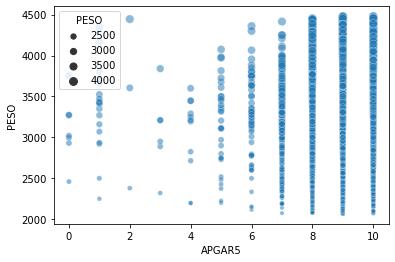

In [43]:
sns.scatterplot(x = 'APGAR5',
               y = 'PESO',
               data = dfa_out,
               alpha = .5,
#                hue = 'SEXO', 
               size = 'PESO' 
               )

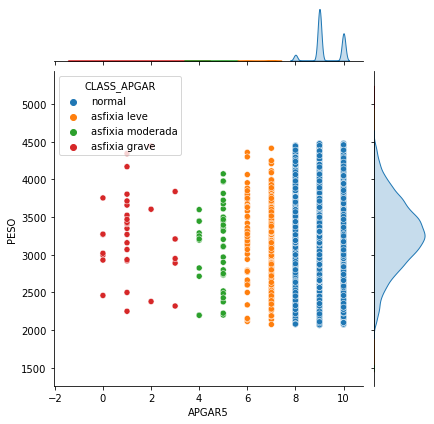

In [44]:
sns.jointplot(data=dfa_out, x = 'APGAR5', y='PESO', hue = 'CLASS_APGAR')